In [19]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library
import numpy.random as rn
from sklearn.linear_model import LinearRegression
import matplotlib.colors as pltco # A package to help with coloring plots


[x for x in dir(list) if not '__' in x]
  
# Curreny Exchange Rates compared to the US dollar from around the world 22 for 2008-2018
projection_central_data = pa.read_csv('https://www.dropbox.com/s/emd7111t9g0rtd2/career_projections_group.csv?dl=1')
bls_data = pa.read_csv('https://www.dropbox.com/s/w1zzumsadlgg9pn/Colorado_Current_Workforce_Demographic.csv?dl=1')

projection_central_data = projection_central_data.drop(0)

projection_central_data = projection_central_data.dropna(axis=1)

bls_data = bls_data.drop(0)
bls_data = bls_data.dropna(axis=1)

In [31]:
projection_central_clean = projection_central_data.drop(columns=['State FIPS', 'Area Name'])
projection_central_clean.head()

,Occupation Code,Occupation Name,Base Year,Base,Projected Year,Projection,Change,Percent Change,Average Annual Openings
1,11-1011,Chief Executives,2018,1290,2020,1310,20,1.6,100
2,11-1021,General and Operations Managers,2018,46420,2020,48450,2030,4.4,4830
3,11-1031,Legislators,2018,720,2020,750,30,4.2,60
4,11-2011.,Advertising and Promotions Managers,2018,590,2020,610,20,3.4,70
5,11-2021.,Marketing Managers,2018,3460,2020,3610,150,4.3,370


In [30]:
bls_data_clean = bls_data.drop(columns=['AREA', 'ST', 'STATE'])
bls_data_clean.head()

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
1,11-0000,Management Occupations,major,"116,770",1.1,44.556,0.85,63.34,"131,750",0.8,26.78,38.28,56.15,78.38,#,"55,700","79,630","116,800","163,030",#
2,11-1011,Chief Executives,detailed,570,5.3,0.216,0.16,95.25,"198,130",5.2,40.92,56.83,86.63,#,#,"85,110","118,210","180,190",#,#
3,11-1021,General and Operations Managers,detailed,"39,200",1.9,14.958,0.95,63.42,"131,920",1.1,22.27,32.52,51.51,81.71,#,"46,310","67,650","107,140","169,970",#
4,11-1031,Legislators,detailed,630,8.0,0.239,0.69,*,"57,570",4.5,*,*,*,*,*,"21,230","23,970","48,260","68,270","100,430"
5,11-2011,Advertising and Promotions Managers,detailed,390,25.9,0.147,0.84,59.12,"122,970",7.1,27.10,45.76,58.58,68.07,87.05,"56,380","95,180","121,850","141,580","181,070"


In [38]:
bls_data_clean['OCC_GROUP'] = bls_data_clean['OCC_GROUP'].astype(str)

In [76]:
detailed_groups_df = bls_data_clean.loc[bls_data_clean.OCC_GROUP.apply(lambda cat: 'detailed' in cat)]

In [77]:
detailed_groups_df.head()

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
2,11-1011,Chief Executives,detailed,570,5.3,0.216,0.16,95.25,"198,130",5.2,40.92,56.83,86.63,#,#,"85,110","118,210","180,190",#,#
3,11-1021,General and Operations Managers,detailed,"39,200",1.9,14.958,0.95,63.42,"131,920",1.1,22.27,32.52,51.51,81.71,#,"46,310","67,650","107,140","169,970",#
4,11-1031,Legislators,detailed,630,8.0,0.239,0.69,*,"57,570",4.5,*,*,*,*,*,"21,230","23,970","48,260","68,270","100,430"
5,11-2011,Advertising and Promotions Managers,detailed,390,25.9,0.147,0.84,59.12,"122,970",7.1,27.10,45.76,58.58,68.07,87.05,"56,380","95,180","121,850","141,580","181,070"
6,11-2021,Marketing Managers,detailed,"3,840",6.2,1.465,0.88,81.55,"169,630",2.3,44.42,57.76,77.82,96.01,#,"92,380","120,150","161,870","199,690",#


In [78]:
detailed_groups_df = detailed_groups_df.replace('-','', regex=True)
detailed_groups_df = detailed_groups_df.replace(',','', regex=True)
detailed_groups_df = detailed_groups_df.replace('#',np.nan)
detailed_groups_df = detailed_groups_df.replace('*',np.nan)
detailed_groups_df = detailed_groups_df.replace('**',np.nan)

In [79]:
detailed_groups_df = detailed_groups_df.dropna(axis=0)

In [80]:
detailed_groups_df = detailed_groups_df.drop(columns=['OCC_GROUP','OCC_TITLE'])

In [81]:
detailed_groups_df.head()

,OCC_CODE,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
5,112011,390,25.9,0.147,0.84,59.12,122970,7.1,27.10,45.76,58.58,68.07,87.05,56380,95180,121850,141580,181070
8,112031,1240,4.6,0.474,0.95,65.86,136990,2.1,36.52,45.86,61.70,78.47,98.37,75970,95390,128330,163210,204600
9,113011,2390,3.2,0.913,0.47,57.52,119650,1.7,30.26,41.16,54.48,70.10,87.39,62940,85620,113320,145800,181770
12,113051,1160,4.8,0.441,0.35,61.72,128380,2.4,30.50,41.67,56.35,74.97,97.65,63430,86670,117200,155940,203100
13,113061,800,4.7,0.307,0.64,69.27,144090,1.8,44.21,54.89,64.82,78.24,96.96,91950,114160,134820,162730,201680


In [82]:
detailed_groups_df_numeric = detailed_groups_df.astype(float)

In [83]:
detailed_groups_df_numeric.dtypes

OCC_CODE     float64
TOT_EMP      float64
EMP_PRSE     float64
JOBS_1000    float64
LOC_Q        float64
H_MEAN       float64
A_MEAN       float64
MEAN_PRSE    float64
H_PCT10      float64
H_PCT25      float64
H_MEDIAN     float64
H_PCT75      float64
H_PCT90      float64
A_PCT10      float64
A_PCT25      float64
A_MEDIAN     float64
A_PCT75      float64
A_PCT90      float64
dtype: object

In [84]:
projection_central_clean.head()

,Occupation Code,Occupation Name,Base Year,Base,Projected Year,Projection,Change,Percent Change,Average Annual Openings
1,11-1011,Chief Executives,2018,1290,2020,1310,20,1.6,100
2,11-1021,General and Operations Managers,2018,46420,2020,48450,2030,4.4,4830
3,11-1031,Legislators,2018,720,2020,750,30,4.2,60
4,11-2011.,Advertising and Promotions Managers,2018,590,2020,610,20,3.4,70
5,11-2021.,Marketing Managers,2018,3460,2020,3610,150,4.3,370


In [85]:
projection_central_clean = projection_central_clean.replace('-','', regex=True)

In [86]:
projection_central_OCC_NAME = projection_central_clean.iloc[:,1:2]

In [88]:
projection_central_numeric = projection_central_clean.drop(columns='Occupation Name')

In [91]:
projection_central_numeric = projection_central_numeric.astype(float)

In [94]:
projection_central_numeric.dtypes

Occupation Code            float64
Base Year                  float64
Base                       float64
Projected Year             float64
Projection                 float64
Change                     float64
Percent Change             float64
Average Annual Openings    float64
dtype: object

In [96]:
projection_central_numeric.drop(projection_central_numeric.columns.difference(['Occupation Code','Projection']), 1, inplace=True)

In [97]:
merged_inner = pa.merge(left=detailed_groups_df_numeric, right=projection_central_numeric, left_on='OCC_CODE', right_on='Occupation Code')
# In this case `species_id` is the only column name in  both dataframes, so if we skipped `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
merged_inner.shape

(541, 20)

In [103]:
merged_inner.head()

,OCC_CODE,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,Projection
0,112011.0,390.0,25.9,0.147,0.84,59.12,122970.0,7.1,27.10,45.76,58.58,68.07,87.05,56380.0,95180.0,121850.0,141580.0,181070.0,610.0
1,112031.0,1240.0,4.6,0.474,0.95,65.86,136990.0,2.1,36.52,45.86,61.70,78.47,98.37,75970.0,95390.0,128330.0,163210.0,204600.0,1240.0
2,113011.0,2390.0,3.2,0.913,0.47,57.52,119650.0,1.7,30.26,41.16,54.48,70.10,87.39,62940.0,85620.0,113320.0,145800.0,181770.0,2540.0
3,113051.0,1160.0,4.8,0.441,0.35,61.72,128380.0,2.4,30.50,41.67,56.35,74.97,97.65,63430.0,86670.0,117200.0,155940.0,203100.0,1180.0
4,113061.0,800.0,4.7,0.307,0.64,69.27,144090.0,1.8,44.21,54.89,64.82,78.24,96.96,91950.0,114160.0,134820.0,162730.0,201680.0,830.0


In [102]:
merged_inner = merged_inner.drop(columns='Occupation Code')

In [104]:
final_df = merged_inner

In [108]:
final_df.shape

(541, 19)

In [111]:
final_df.head()    # All data types are converted to float64 at this point - I picked not to normalize it for this part

,OCC_CODE,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,Projection
0,112011.0,390.0,25.9,0.147,0.84,59.12,122970.0,7.1,27.10,45.76,58.58,68.07,87.05,56380.0,95180.0,121850.0,141580.0,181070.0,610.0
1,112031.0,1240.0,4.6,0.474,0.95,65.86,136990.0,2.1,36.52,45.86,61.70,78.47,98.37,75970.0,95390.0,128330.0,163210.0,204600.0,1240.0
2,113011.0,2390.0,3.2,0.913,0.47,57.52,119650.0,1.7,30.26,41.16,54.48,70.10,87.39,62940.0,85620.0,113320.0,145800.0,181770.0,2540.0
3,113051.0,1160.0,4.8,0.441,0.35,61.72,128380.0,2.4,30.50,41.67,56.35,74.97,97.65,63430.0,86670.0,117200.0,155940.0,203100.0,1180.0
4,113061.0,800.0,4.7,0.307,0.64,69.27,144090.0,1.8,44.21,54.89,64.82,78.24,96.96,91950.0,114160.0,134820.0,162730.0,201680.0,830.0


In [112]:
final_df.shape

(541, 19)

### START OF RNN - https://www.analyticsvidhya.com/blog/2019/01/fundamentals-deep-learning-recurrent-neural-networks-scratch-python/

In [116]:
from sklearn.model_selection import train_test_split

In [176]:
X = np.array(final_df.iloc[:,1:16])

y = np.array(final_df.iloc[:,16:17])

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [177]:
y.shape

(541, 1)

In [183]:
X.shape

(541, 15)

In [178]:
len(X)

541

In [220]:
learning_rate = 0.0001    
nepoch = 25               
T = 15                  # length of sequence
hidden_dim = 541         
output_dim = 1

bptt_truncate = 5
min_clip_value = -100
max_clip_value = 100


In [221]:
U = np.random.uniform(0, 1, (hidden_dim, T))
W = np.random.uniform(0, 1, (hidden_dim, hidden_dim))
V = np.random.uniform(0, 1, (output_dim, hidden_dim))

In [222]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [223]:
for epoch in range(nepoch):
    # check loss on train
    loss = 0.0
    
    # do a forward pass to get prediction
    for i in range(y.shape[0]):
        x = X[i] 
        Y = y[i]                    # get input, output values of each record
        prev_s = np.zeros((hidden_dim, 1))   # here, prev-s is the value of the previous activation of hidden layer; which is initialized as all zeroes
        for t in range(T):
            new_input = np.zeros(x.shape)    # we then do a forward pass for every timestep in the sequence
            new_input[t] = x[t]              # for this, we define a single input for that timestep
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            prev_s = s

    # calculate error 
        loss_per_record = (Y - mulv)**2 / 2
        loss += loss_per_record
    loss = loss / y.shape[0]

In [224]:
# check loss on val
val_loss = 0.0
for i in range(y_test.shape[0]):
    x = x_test[i]
    y = y_test[i]
    prev_s = np.zeros((hidden_dim, 1))
    for t in range(T):
        new_input = np.zeros(x.shape)
        new_input[t] = x[t]
        mulu = np.dot(U, new_input)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        prev_s = s

    loss_per_record = (y - mulv)**2 / 2
    val_loss += loss_per_record
val_loss = val_loss / float(y.shape[0])

    #print('Epoch: ', epoch + 1, ', Loss: ', loss, ', Val Loss: ', val_loss);

In [225]:
# train model
for i in range(y.shape[0]):
    x = X[i]
    Y = y[i]
    
    layers = []
    prev_s = np.zeros((hidden_dim, 1))
    dU = np.zeros(U.shape)
    dV = np.zeros(V.shape)
    dW = np.zeros(W.shape)
        
    dU_t = np.zeros(U.shape)
    dV_t = np.zeros(V.shape)
    dW_t = np.zeros(W.shape)
        
    dU_i = np.zeros(U.shape)
    dW_i = np.zeros(W.shape)
        
    # forward pass
    for t in range(T):
        new_input = np.zeros(x.shape)
        new_input[t] = x[t]
        mulu = np.dot(U, new_input)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        layers.append({'s':s, 'prev_s':prev_s})
        prev_s = s

In [232]:
# derivative of pred
dmulv = (mulv - y)
        
# backward pass
for t in range(T):
    dV_t = np.dot(dmulv, np.transpose(layers[t]['s']))
    dsv = np.dot(np.transpose(V), dmulv)
            
    ds = dsv
    dadd = add * (1 - add) * ds
            
    dmulw = dadd * np.ones_like(mulw)

    dprev_s = np.dot(np.transpose(W), dmulw)


    for i in range(t-1, max(-1, t-bptt_truncate-1), -1):
        ds = dsv + dprev_s
        dadd = add * (1 - add) * ds

        dmulw = dadd * np.ones_like(mulw)
        dmulu = dadd * np.ones_like(mulu)

        dW_i = np.dot(W, layers[t]['prev_s'])
        dprev_s = np.dot(np.transpose(W), dmulw)

        new_input = np.zeros(x.shape)
        new_input[t] = x[t]
        
        dU_i = np.dot(U, new_input)
        dU_i.resize(541,15)
        dx = np.dot(np.transpose(U), dmulu)

        dU_t += dU_i
        dW_t += dW_i
                
    dV += dV_t
    dU += dU_t
    dW += dW_t

In [234]:
if dU.max() > max_clip_value:
    dU[dU > max_clip_value] = max_clip_value
if dV.max() > max_clip_value:
    dV[dV > max_clip_value] = max_clip_value
if dW.max() > max_clip_value:
    dW[dW > max_clip_value] = max_clip_value
                
if dU.min() < min_clip_value:
    dU[dU < min_clip_value] = min_clip_value
if dV.min() < min_clip_value:
    dV[dV < min_clip_value] = min_clip_value
if dW.min() < min_clip_value:
    dW[dW < min_clip_value] = min_clip_value
        
        # update
U -= learning_rate * dU
V -= learning_rate * dV
W -= learning_rate * dW

In [235]:
preds = []
for i in range(y.shape[0]):
    x = X[i]
    Y = y[i]
    prev_s = np.zeros((hidden_dim, 1))
    # Forward pass
    for t in range(T):
        mulu = np.dot(U, x)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        prev_s = s

    preds.append(mulv)
    
preds = np.array(preds)

IndexError: too many indices for array

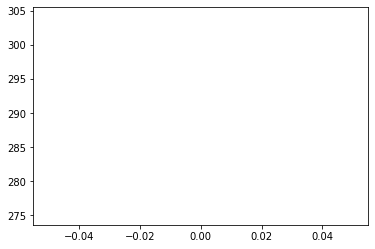

In [243]:
plt.plot(preds[:, 0, 0], 'g')
plt.plot(y[:, 0], 'r')
plt.show()

In [246]:
preds = []
for i in range(y_test.shape[0]):
    x = x_test[i], 
    y_test = y_test[i]
    prev_s = np.zeros((hidden_dim, 1))
    # For each time step...
    for t in range(T):
        mulu = np.dot(U, x)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        prev_s = s

    preds.append(mulv)
    
preds = np.array(preds)

plt.plot(preds[:, 0, 0], 'g')
plt.plot(y_test[:, 0], 'r')
plt.show()

ValueError: shapes (541,15) and (1,15) not aligned: 15 (dim 1) != 1 (dim 0)